#Import libraries

In [ ]:
import numpy as np        # To perform the Mathematical operation
import pandas as pd # Data Manipulation tool
from numpy import *
from matplotlib import *

# Data Visualisation tool
import matplotlib.pyplot as plt       
import seaborn as sns                 

# To check accuracy
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error

# For encoding and scaling 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

# train_test_split <- divide train and test set
# GridSearchCV <- classifier hyper parameter tunning 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RepeatedKFold

# Regression methods 
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV, LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score


In [ ]:
import sklearn
sklearn.__version__

'1.0.2'

In [ ]:
!pip install scikit-learn==0.24.2

     |████████████████████████████████| 22.3 MB 1.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.


In [ ]:
import sklearn
sklearn.__version__

'0.24.2'

#Import dataset

In [ ]:
df = pd.read_csv('AppleStore (1).csv')
df.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


#Data cleaning

##ver

In [ ]:
versions = df['ver']
versions
#versions.shape
#str.split(versions[1],'.')

0        6.3.5
1        8.2.2
2        5.0.0
3       5.10.0
4        7.5.1
         ...  
7192       1.3
7193       0.9
7194     1.0.2
7195    1.0.15
7196         1
Name: ver, Length: 7197, dtype: object

In [ ]:
versions = df['ver']
versions
y = []
a = []
b = []
c = []

for x in range(0,7197):
    y= str.split(versions[x],'.')
    if len(y) <0:
        a.append('0')
    else:
        a.append(y[0])
for x in range(0,7197):
    y= str.split(versions[x],'.')
    if len(y) <2:
        b.append('0')
    else:
        b.append(y[1])
for x in range(0,7197):
    y= str.split(versions[x],'.')
    if len(y) <3:
        c.append('0')
    else:
        c.append(y[2])

In [ ]:
val1 = np.array(a)
val2 = np.array(b)
val3 = np.array(c)

In [ ]:
df.insert(loc=14,column='Major', value=val1)
df.insert(loc=15, column='Minor', value=val2)
df.insert(loc=16, column='Patch', value=val3)

In [ ]:
df['Major'] = pd.to_numeric(df['Major'])
df['Minor'] = pd.to_numeric(df['Minor'])
df['Patch'] = pd.to_numeric(df['Patch'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  Major             7197 non-null   int64  
 15  Minor             7197 non-null   int64  
 16  Patch             7196 non-null   float64


##cont_rating

In [ ]:
df.cont_rating.value_counts()

4+     4433
12+    1155
9+      987
17+     622
Name: cont_rating, dtype: int64

In [ ]:
ohe = OneHotEncoder(sparse=False)
new_cont_rating = ohe.fit_transform(df[['cont_rating']])

In [ ]:
df[['12+', '17+', '4+', '9+']] = new_cont_rating

In [ ]:
df.drop(['cont_rating','ver','track_name'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   prime_genre       7197 non-null   object 
 10  sup_devices.num   7197 non-null   int64  
 11  Major             7197 non-null   int64  
 12  Minor             7197 non-null   int64  
 13  Patch             7196 non-null   float64
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


In [ ]:
df.drop(['Unnamed: 0','id','currency'],axis = 1,inplace = True)

##prime genre

In [ ]:
df.prime_genre.value_counts()

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

**reducing the categories**

In [ ]:
df.prime_genre.replace(['Lifestyle','Sports', 'Finance', 'Book', 'Travel', 'News', 'Weather', 'Food & Drink', 'Reference', 'Business', 'Navigation', 'Medical', 'Catalogs'], 
                           ['Others','Others','Others','Others','Others','Others','Others','Others','Others','Others','Others','Others','Others'], inplace=True)

In [ ]:
df.prime_genre.replace(['Photo & Video', 'Utilities', 'Health & Fitness', 'Health & Fitness', 'Productivity', 'Social Networking', 'Music'], 
                           ['Others','Others','Others','Others','Others','Others','Others'], inplace=True)

In [ ]:
df.prime_genre.value_counts()
new_prime_genre = ohe.fit_transform(df[['prime_genre']])
df[['Education','Entertainment', 'Games', 'Others','Shopping']] = new_prime_genre

In [ ]:
df['size_bytes']= df['size_bytes']/1024**2

In [ ]:
#drop prime genre column
df=df.drop('prime_genre',axis=1)

#Train test split

In [ ]:
x = df.drop('user_rating', axis=1)

In [ ]:
y = df['user_rating']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [ ]:
train = pd.concat([x_train, y_train], axis=1)

In [ ]:
X = train.drop('user_rating', axis=1)
Y = train['user_rating']

In [ ]:
feature_names = tuple(X.columns)
feature_names

('size_bytes',
 'price',
 'rating_count_tot',
 'rating_count_ver',
 'user_rating_ver',
 'sup_devices.num',
 'Major',
 'Minor',
 'Patch',
 'ipadSc_urls.num',
 'lang.num',
 'vpp_lic',
 '12+',
 '17+',
 '4+',
 '9+',
 'Education',
 'Entertainment',
 'Games',
 'Others',
 'Shopping')

In [ ]:
X.var()

size_bytes          1.166789e+05
price               3.824134e+01
rating_count_tot    6.519579e+09
rating_count_ver    1.597404e+07
user_rating_ver     3.261050e+00
sup_devices.num     1.417856e+01
Major               9.486034e+04
Minor               9.197676e+07
Patch               7.178693e+14
ipadSc_urls.num     3.968281e+00
lang.num            6.492705e+01
vpp_lic             7.072274e-03
12+                 1.329871e-01
17+                 7.716140e-02
4+                  2.361509e-01
9+                  1.204234e-01
Education           5.848040e-02
Entertainment       6.971547e-02
Games               2.486027e-01
Others              2.128952e-01
Shopping            1.673589e-02
dtype: float64

#Feature selection

**variablity of vpp_lic is 10**-3, therefore we'll drop that**

In [ ]:
X = X.drop('vpp_lic', axis=1)
X = X.drop('Patch',axis=1)
feature_names = tuple(X.columns)
feature_names

('size_bytes',
 'price',
 'rating_count_tot',
 'rating_count_ver',
 'user_rating_ver',
 'sup_devices.num',
 'Major',
 'Minor',
 'ipadSc_urls.num',
 'lang.num',
 '12+',
 '17+',
 '4+',
 '9+',
 'Education',
 'Entertainment',
 'Games',
 'Others',
 'Shopping')

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sbs = SFS(#knn(n_neighbors=3),
           #rfc(n_jobs=8),
           LinearRegression(n_jobs=8),
           k_features='best', 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring = 'neg_mean_squared_error'  # sklearn regressors
           #scoring='accuracy',  # sklearn classifiers
           )

ModuleNotFoundError: ignored

In [ ]:
sbs = sbs.fit(X, Y,custom_feature_names=feature_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s finished

[2022-03-09 23:17:18] Features: 18/1 -- score: -0.9027397979326242[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished

[2022-03-09 23:17:19] Features: 17/1 -- score: -0.9027397979326233[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s finished

[2022-03-09 23:17:19] Features: 16/1 -- score: -0.9022394141450818[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [ ]:
sbs.k_feature_names_, sbs.k_feature_idx_

(('size_bytes',
  'price',
  'rating_count_tot',
  'rating_count_ver',
  'user_rating_ver',
  'sup_devices.num',
  'Major',
  'ipadSc_urls.num',
  'lang.num',
  'Entertainment',
  'Education',
  'Games',
  'Others'),
 (0, 1, 2, 3, 4, 5, 6, 8, 9, 14, 15, 16, 17))

In [ ]:
X = X.drop(['12+','17+','4+','9+','Minor'],axis=1)

#Model Evaluation

##Linear regression

In [ ]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [ ]:
print(lm.intercept_)

1.5858751651430238


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
size_bytes,-3.245495e-05
price,5.109432e-03
rating_count_tot,1.647307e-07
rating_count_ver,2.733760e-06
user_rating_ver,6.317114e-01
sup_devices.num,-7.392900e-03
Major,2.828374e-05
ipadSc_urls.num,5.660292e-02
lang.num,5.861604e-03
Education,-8.389052e-02


In [ ]:
import statsmodels.api as sm
from scipy import stats

X = sm.add_constant(X)
est = sm.OLS(Y, X)
est2 = est.fit()
print(est2.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:            user_rating   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     685.9
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:17:30   Log-Likelihood:                -7859.3
No. Observations:                5757   AIC:                         1.575e+04
Df Residuals:                    5743   BIC:                         1.584e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.3216      0.114  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**As we can see the p values of size_bytes, rating_count_tot, rating_count_ver and Major has a p value greater than 0.05**

**Let us drop them and refit the model again**

In [ ]:
X = sm.add_constant(X.drop(['Major'],axis=1))
est = sm.OLS(Y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            user_rating   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     743.0
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:17:42   Log-Likelihood:                -7859.6
No. Observations:                5757   AIC:                         1.575e+04
Df Residuals:                    5744   BIC:                         1.583e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.3205      0.114  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X = sm.add_constant(X.drop(['size_bytes'],axis=1))
est = sm.OLS(Y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            user_rating   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     810.6
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:17:45   Log-Likelihood:                -7859.9
No. Observations:                5757   AIC:                         1.574e+04
Df Residuals:                    5745   BIC:                         1.582e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.3042      0.112  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X = sm.add_constant(X.drop(['rating_count_ver'],axis=1))
est = sm.OLS(Y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            user_rating   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     891.6
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:17:48   Log-Likelihood:                -7860.3
No. Observations:                5757   AIC:                         1.574e+04
Df Residuals:                    5746   BIC:                         1.582e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.3016      0.112  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X = sm.add_constant(X.drop(['rating_count_tot'],axis=1))
est = sm.OLS(Y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            user_rating   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     990.4
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:17:57   Log-Likelihood:                -7861.0
No. Observations:                5757   AIC:                         1.574e+04
Df Residuals:                    5747   BIC:                         1.581e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.3004      0.112     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Choose the same variables for the test set**

In [ ]:
x_test = x_test[['price','user_rating_ver','sup_devices.num','ipadSc_urls.num','lang.num','Games','Others','Entertainment','Education','Shopping']]
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1440 entries, 3592 to 1423
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1440 non-null   float64
 1   user_rating_ver  1440 non-null   float64
 2   sup_devices.num  1440 non-null   int64  
 3   ipadSc_urls.num  1440 non-null   int64  
 4   lang.num         1440 non-null   int64  
 5   Games            1440 non-null   float64
 6   Others           1440 non-null   float64
 7   Entertainment    1440 non-null   float64
 8   Education        1440 non-null   float64
 9   Shopping         1440 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 123.8 KB


In [ ]:
X = X[['price','user_rating_ver','sup_devices.num','ipadSc_urls.num','lang.num','Games','Others','Entertainment','Education','Shopping']]
X.info()
x_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5757 entries, 122 to 860
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            5757 non-null   float64
 1   user_rating_ver  5757 non-null   float64
 2   sup_devices.num  5757 non-null   int64  
 3   ipadSc_urls.num  5757 non-null   int64  
 4   lang.num         5757 non-null   int64  
 5   Games            5757 non-null   float64
 6   Others           5757 non-null   float64
 7   Entertainment    5757 non-null   float64
 8   Education        5757 non-null   float64
 9   Shopping         5757 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 494.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1440 entries, 3592 to 1423
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1440 non-null   float64
 1   user_rating_ver  1440 non-null   fl

In [ ]:
#Fit the final simple linear regression model
lm = LinearRegression()

lm.fit(X,Y)

LinearRegression()

In [ ]:
predictions = lm.predict(X)

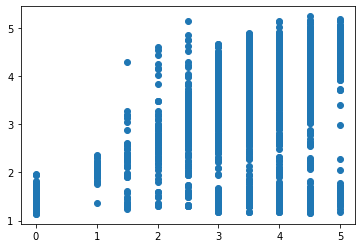

In [ ]:
plt.scatter(y_train,predictions)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


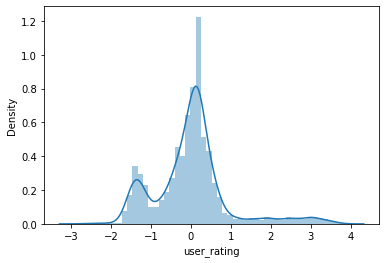

In [ ]:
sns.distplot((y_train-predictions),bins=50)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_train, predictions))
print('MSE:', metrics.mean_squared_error(y_train, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predictions)))

MAE: 0.636123169038673
MSE: 0.8985715941401349
RMSE: 0.9479301631133672


In [ ]:
#Error terms are not normal but let us evaluate the test MSe
test_pred = lm.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, test_pred))
print('MSE:', metrics.mean_squared_error(y_test, test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,test_pred)))


MAE: 0.6517105625984374
MSE: 0.9337845907056233
RMSE: 0.9663253027348623


## Ridge Regression

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
#define model
model = RidgeCV(alphas= arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')

In [ ]:
x = df.drop('user_rating', axis=1)
y = df['user_rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
train = pd.concat([x_train, y_train], axis=1)
X = train.drop('user_rating', axis=1)
Y = train['user_rating']

# Application of variable selection
X = X.drop(['12+','17+','4+','9+','Minor','vpp_lic','Patch'],axis=1)
x_test = x_test.drop(['12+','17+','4+','9+','Minor','vpp_lic','Patch'],axis=1)


In [ ]:
model.fit(X,Y)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.35015e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40006e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.76359e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.71602e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37749e-27): result may not be accurate.
  r

RidgeCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
        scoring='neg_mean_absolute_error')

In [ ]:
print(model.alpha_)

0.99


In [ ]:
ridge_predictions = model.predict(X)

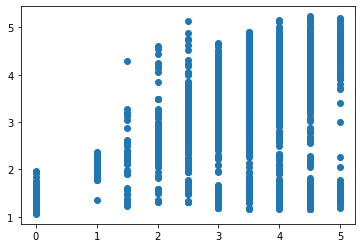

In [ ]:
plt.scatter(y_train,ridge_predictions)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_train, ridge_predictions))
print('MSE:', metrics.mean_squared_error(y_train, ridge_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, ridge_predictions)))

MAE: 0.6353961010015022
MSE: 0.8980509832733458
RMSE: 0.947655519307172


In [ ]:
# Prediction for the test set 
ridge_test_predictions = model.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, ridge_test_predictions))
print('MSE:', metrics.mean_squared_error(y_test,ridge_test_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridge_test_predictions)))

MAE: 0.6508449964558832
MSE: 0.9326123015922629
RMSE: 0.9657185416011557


## Lasso Regression


In [ ]:
#fit model
x = df.drop('user_rating', axis=1)
y = df['user_rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
train = pd.concat([x_train, y_train], axis=1)
X = train.drop(['user_rating','vpp_lic','Patch'], axis=1)
Y = train['user_rating']
x_test = x_test.drop(['vpp_lic','Patch'], axis=1)

# Since Lasso can work as a varible selection technique as well we don't use variable selection for this.
model = LassoCV(alphas=arange(0, 1, 0.01), cv=cv, n_jobs=-1)
model.fit(X,Y)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2367.0749099113928, tolerance: 1.1958204690214242
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2321.0625417526217, to

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2320.961487831886, tolerance: 1.1850068037058488
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2315.7923005453913, tolerance: 1.2053810739096873
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected r

LassoCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1), n_jobs=-1)

In [ ]:
#display lambda that produced the lowest test MSE
print(model.alpha_)

0.0


In [ ]:
#Predictions using Lasso for the trest set
lasso_predictions = model.predict(X)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_train, lasso_predictions))
print('MSE:', metrics.mean_squared_error(y_train, lasso_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, lasso_predictions)))

MAE: 0.6352936963354693
MSE: 0.897560717302723
RMSE: 0.947396810899595


In [ ]:
#Predictions for the test set using Lasso Regression
lasso_test_predictions=model.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test,lasso_test_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lasso_test_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_test_predictions)))

MAE: 0.6503231961471373
MSE: 0.9320681334952511
RMSE: 0.965436757895229


## Decision Tree

In [ ]:
x = df.drop('user_rating', axis=1)
y = df['user_rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
train = pd.concat([x_train, y_train], axis=1)
X = train.drop(['user_rating','vpp_lic','Patch'], axis=1)
Y = train['user_rating']
x_test = x_test.drop(['vpp_lic','Patch'], axis=1)


In [ ]:
dtree = DecisionTreeRegressor(max_leaf_nodes=85)
dtree.fit(X,Y)
dt_predictions = dtree.predict(X)
# Decison tree it self can work as a variable selection technique

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


In [ ]:
# dt training mse
print('MAE:', metrics.mean_absolute_error(y_train, dt_predictions))
print('MSE:', metrics.mean_squared_error(y_train,dt_predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,dt_predictions)))


MAE: 0.26160706962961905
MSE: 0.15437031970078965
RMSE: 0.3928998850862515


In [ ]:
# Decion tree gets over fitted
dt_test_predictions = dtree.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, dt_test_predictions))
print('MSE:', metrics.mean_squared_error(y_test,dt_test_predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,dt_test_predictions)))


MAE: 0.307148860931111
MSE: 0.24181664224423235
RMSE: 0.4917485559147402


In [ ]:
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, X, Y, cv=10)

array([0.87169884, 0.82244644, 0.8576863 , 0.83002113, 0.80119366,
       0.82323106, 0.83938156, 0.81421875, 0.80983768, 0.82387895])

In [ ]:
features = list(X.columns[0:])
features

['size_bytes',
 'price',
 'rating_count_tot',
 'rating_count_ver',
 'user_rating_ver',
 'sup_devices.num',
 'Major',
 'Minor',
 'ipadSc_urls.num',
 'lang.num',
 '12+',
 '17+',
 '4+',
 '9+',
 'Entertainment',
 'Education',
 'Games',
 'Others',
 'Shopping']

In [ ]:
# visualization of the decison tree

## Random Forest 



In [ ]:
x = df.drop('user_rating', axis=1)
y = df['user_rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
train = pd.concat([x_train, y_train], axis=1)
X = train.drop('user_rating', axis=1)
Y = train['user_rating']

# Application of variable selection
X = X.drop(['12+','17+','4+','9+','Minor','vpp_lic','Patch'],axis=1)
x_test = x_test.drop(['12+','17+','4+','9+','Minor','vpp_lic','Patch'],axis=1)


In [ ]:
# Fitting Random Forest Regression to the Training set
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [ ]:
regressor.fit(X, Y)

RandomForestRegressor(random_state=0)

In [ ]:
X.head()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating_ver,sup_devices.num,Major,ipadSc_urls.num,lang.num,Education,Entertainment,Games,Others,Shopping
122,16.222656,0.99,53821,165,4.0,43,1,1,1,0.0,0.0,1.0,0.0,0.0
479,71.356445,0.00,130823,29363,5.0,37,5,4,2,0.0,0.0,0.0,0.0,1.0
4439,220.705078,0.99,0,0,0.0,37,1,5,2,1.0,0.0,0.0,0.0,0.0
2575,103.663086,0.00,8227,178,4.5,24,1,5,1,0.0,0.0,1.0,0.0,0.0
293,95.414062,1.99,2417,1366,4.5,38,6,2,1,0.0,0.0,0.0,1.0,0.0


In [ ]:
#Training set prediction
y_pred = regressor.predict(X)
print('MAE:',mean_absolute_error(y_train,y_pred))
print('MSE:', mean_squared_error(y_train,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_train,y_pred)))

MAE: 0.10454837589022056
MSE: 0.02780235799895779
RMSE: 0.16674039102436394


In [ ]:
#Test set prediction
y_pred_test = regressor.predict(x_test)
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test,y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred_test)))


MAE: 0.27827430555555555
MSE: 0.19675359375
RMSE: 0.44356915328954066


In [ ]:
# Parameter tuning in Random Forest

max_depth=[2, 8, 16]
n_estimators = [64, 128, 256]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

# Build the grid search
dfrst = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5)
grid_results = grid.fit(X,Y)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
results_df

Best: [0.86445652 0.86437044 0.86439297 0.91233362 0.91285334 0.91239437
 0.91131754 0.91263868 0.91264601], using {'max_depth': 8, 'n_estimators': 128}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.250575,0.004226,0.008515,0.000314,2,64,"{'max_depth': 2, 'n_estimators': 64}",0.865122,0.872194,0.855391,0.869538,0.860038,0.864457,0.006129,7
1,0.492426,0.006603,0.017209,0.004125,2,128,"{'max_depth': 2, 'n_estimators': 128}",0.865075,0.872145,0.855299,0.869335,0.859998,0.864370,0.006116,9
2,0.976197,0.008409,0.026221,0.002486,2,256,"{'max_depth': 2, 'n_estimators': 256}",0.865108,0.872182,0.855311,0.869361,0.860003,0.864393,0.006126,8
3,0.657203,0.005155,0.012879,0.000550,8,64,"{'max_depth': 8, 'n_estimators': 64}",0.918954,0.916872,0.903562,0.910645,0.911636,0.912334,0.005380,5
4,1.309372,0.007033,0.023067,0.001821,8,128,"{'max_depth': 8, 'n_estimators': 128}",0.919851,0.918810,0.904575,0.910821,0.910210,0.912853,0.005729,1
5,2.630680,0.018577,0.042272,0.000653,8,256,"{'max_depth': 8, 'n_estimators': 256}",0.918844,0.917785,0.904378,0.910329,0.910636,0.912394,0.005335,4
6,1.086190,0.006316,0.019812,0.000215,16,64,"{'max_depth': 16, 'n_estimators': 64}",0.920454,0.916699,0.900944,0.908937,0.909553,0.911318,0.006765,6
7,2.159144,0.008128,0.037331,0.000948,16,128,"{'max_depth': 16, 'n_estimators': 128}",0.920916,0.917499,0.903508,0.910403,0.910867,0.912639,0.006060,3
8,4.465427,0.313340,0.072577,0.002025,16,256,"{'max_depth': 16, 'n_estimators': 256}",0.920707,0.917890,0.902917,0.910341,0.911375,0.912646,0.006230,2


In [ ]:
regressor = RandomForestRegressor(n_estimators = 128, random_state = 0,max_depth = 8)

In [ ]:
regressor.fit(X, Y)
#Training set prediction
y_pred = regressor.predict(X)
print('MAE:', mean_absolute_error(y_train,y_pred))
print('MSE:', mean_squared_error(y_train,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_train,y_pred)))

MAE: 0.2571740960118481
MSE: 0.1534507736499743
RMSE: 0.39172793320106025


In [ ]:
# MAE: 0.2571740960118481
# MSE: 0.1534507736499743
# RMSE: 0.39172793320106025

# MAE: 0.28177631866633657
# MSE: 0.19490990568313105
# RMSE: 0.44148601980485297

In [ ]:
#Test set prediction
y_pred_test = regressor.predict(x_test)
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test,y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred_test)))

MAE: 0.28177631866633657
MSE: 0.19490990568313105
RMSE: 0.44148601980485297


In [ ]:
sklearn.__version__

'0.24.2'

In [ ]:
import pickle

In [ ]:
with open('rf_model2.pkl','wb') as files:
  pickle.dump(regressor, files)

###Mean absolute percentage error

In [ ]:
# Calculating Mean Absolute percentage error for random forest model
df2 = pd.DataFrame()
df2['values']=abs(y_pred_test-y_test)/y_test

In [ ]:
df2=df2.dropna()

In [ ]:
mean(df2['values'])*100

9.808737064909273

In [ ]:
# Calculating Mean Absolute percentage error for ridge regression model
df3 = pd.DataFrame()
df3['values']=abs(ridge_test_predictions-y_test)/y_test

In [ ]:
df3[df3.replace([np.inf,-np.inf],np.nan).notnull().all (axis=1)] 

,values
3592,0.097577
2178,0.093436
1760,0.010378
5655,0.978317
5944,0.516883
...,...
911,0.684915
4343,0.060379
3332,0.638806
6343,0.041231


In [ ]:
df3= df3[df3['values']!=Inf]

In [ ]:
mean(df3['values'])*100

15.33015872405822

In [ ]:
# Calculating Mean Absolute percentage error for Lasso regression model
df4 = pd.DataFrame()
df4['values']=abs(lasso_test_predictions-y_test)/y_test

In [ ]:
df4[df4.replace([np.inf,-np.inf],np.nan).notnull().all (axis=1)] 

,values
3592,0.094357
2178,0.094275
1760,0.015124
5655,0.953138
5944,0.522432
...,...
911,0.677706
4343,0.055296
3332,0.648601
6343,0.025615


In [ ]:
df4= df4[df4['values']!=Inf]

In [ ]:
mean(df4['values'])*100

15.310069141171764

In [ ]:
# linear regression
df3 = pd.DataFrame()
df3['values']=abs(test_pred-y_test)/y_test

In [ ]:
df3

,values
3592,0.097987
2178,0.092423
1760,0.008432
5655,0.980823
5944,0.515461
...,...
3332,0.637916
2029,inf
6343,0.042032
6652,inf


In [ ]:
df4[df4.replace([np.inf,-np.inf],np.nan).notnull().all (axis=1)] 

,values
3592,0.094357
2178,0.094275
1760,0.015124
5655,0.953138
5944,0.522432
...,...
911,0.677706
4343,0.055296
3332,0.648601
6343,0.025615


In [ ]:
df3= df3[df3['values']!=Inf]

In [ ]:
mean(df3['values'])*100

15.359934137802691

In [ ]:
# Calculating Mean Absolute percentage error for Decion tree regression model
df4 = pd.DataFrame()
df4['values']=abs(dt_test_predictions-y_test)/y_test

In [ ]:
df4[df4.replace([np.inf,-np.inf],np.nan).notnull().all (axis=1)] 

,values
3592,0.120000
2178,0.096780
1760,0.019689
5655,0.052632
5944,0.400538
...,...
911,0.050403
4343,0.102365
3332,0.025000
6343,0.133333


In [ ]:
df4= df4[df4['values']!=Inf]

In [ ]:
mean(df4['values'])*100

10.502667414652413